In [11]:
f=open("troyanos_T.txt","r")
xdata=[]
ydata=[]
for i in range(0,1227521):
    list=f.readline().split()
    xdata.append(float(list[0]))
    ydata.append(float(list[1]))

In [26]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#función de fitting: gaussiana más recta
def func(t,B,a,T1,d1,b,T2,d2):
    y1=B+a*np.sin(2*np.pi/T1*t+d1)+b*np.sin(2*np.pi/T2*t+d2)
    return y1

#función para obtener mínimos coeficiente R cuadrado a partir del fitting
def Rsqrt(xdata,ydata,popt):
    arr=np.array(xdata)
    residuals=ydata-func(arr,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1 - (ss_res / ss_tot)

#función de plot de los datos para echar un ojo
def plot_data():
    plt.figure()
    plt.plot(xdata,ydata,"-")
    plt.show()
    
#función de fit que saca todos los resultados y las gráficas
def plot_fit(B,a,T1,d1,b,T2,b2):
    popt,pcov=curve_fit(func, xdata, ydata,p0=(B,a,T1,d1,b,T2,b2))
    B=popt[0]
    a=popt[1]
    T1=popt[2]
    d1=popt[3]
    b=popt[4]
    T2=popt[5]
    d2=popt[6]

    #resultados del fitting
    print("fit function:") 
    print("B=",popt[0],"\t\u0394B=",np.sqrt(pcov[0][0]))
    print("a=",popt[1],"\t\u0394a=",np.sqrt(pcov[1][1]))
    print("T\u2081=",popt[2],"\t\u0394T\u2081=",np.sqrt(pcov[2][2]))
    print("d\u2081=",popt[3],"\t\u0394d\u2081=",np.sqrt(pcov[3][3]))
    print("b=",popt[4],"\t\u0394b=",np.sqrt(pcov[4][4]))
    print("T\u2082=",popt[5],"\t\u0394T\u2082=",np.sqrt(pcov[5][5]))
    print("d\u2082=",popt[6],"\t\u0394d\u2081=",np.sqrt(pcov[6][6]))
    print()
    print("R\u00b2=",Rsqrt(xdata,ydata,popt))

    #plot del fitting contra los datos experimentales
    xarr=np.arange(xdata[0],xdata[len(xdata)-1],0.01)

    plt.figure(dpi=80)
    plt.plot(xdata,ydata,".")
    plt.plot(xarr,func(xarr,B,a,T1,d1,b,T2,d2),"r-")
    plt.show()
    

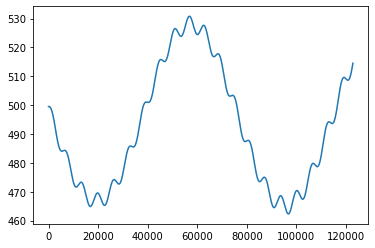

In [15]:
#aca se pueden plotear los datos sin fit para visualizar
#args: nombre, data, valor inicial para graficar, valor final para graficar
plot_data()

fit function:
B= 496.8818920999173 	ΔB= 0.0007044026004204687
a= -30.883388310277244 	Δa= 0.0009996065483140104
T₁= 76261.6044690971 	ΔT₁= 0.7503580566485796
d₁= -0.01999598190248526 	Δd₁= 5.9350150157639245e-05
b= 2.902679318326222 	Δb= 0.0009378815721327545
T₂= 6162.512372136076 	ΔT₂= 0.055515917528824135
d₂= 6.539614681224956 	Δd₁= 0.0006503514380638373

R²= 0.9987327784526076


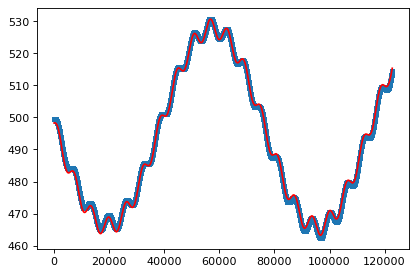

In [27]:
#arg: nombre,data,valor inicial de fit, valor final de fit, guess: b0,b1,M,mu,sigma
#el valor del guess de M debe cambiar dependiendo de la gráfica, como el máximo de la función que se estudia, el resto se pueden
#dejar quietos
plot_fit(500,30,80000,0,50,6000,0)